<a href="https://colab.research.google.com/github/vsvt2000/Neural_Networks_15CSE338/blob/main/TLNs_and_NNs_for_Logical_Circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import keras
import pandas as pd
from keras.layers import Dense
import numpy as np
from keras.utils.vis_utils import plot_model
!pip3 install keras-visualizer
!pip install vpython
from keras_visualizer import visualizer
import matplotlib.pyplot as plt
from vpython import *

     |████████████████████████████████| 3.7MB 5.4MB/s 
     |████████████████████████████████| 501kB 37.7MB/s 
     |████████████████████████████████| 1.3MB 37.4MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 3.2MB 46.1MB/s 
     |████████████████████████████████| 296kB 31.8MB/s 
     |████████████████████████████████| 143kB 32.4MB/s 


# PLOT FUNCTIONS

In [ ]:
def plot_gate(X,y):
  fig, ax = plt.subplots()
  xmin, xmax = -0.2, 1.4
  ct0=0
  ct1=0
  x0=-1
  y0=-1
  x1=-1
  y1=-1
  for index, row in X.iterrows():
    if(y['y'][index]==0):
      ax.scatter(row['x1'], row['x2'],color="red")
      ct0+=1
      x0=row['x1']
      y0=row['x2']
    else:
      ax.scatter(row['x1'], row['x2'],color="green")
      ct1+=1
      x1=row['x1']
      y1=row['x2']
  pX = np.arange(xmin, xmax, 0.1)
  ax.set_xlim([xmin, xmax])
  ax.set_ylim([-0.1, 1.1])
  if((ct0==1)or(ct1==1)):
    if ct0==1 :
      ptX=x0
      ptY=y0
    else:
      ptX=x1
      ptY=y1
  #print(ptX,ptY)
  if ((ptX==0)and(ptY==0)):
    m, c = -1, 0.8
  elif ((ptX==0)and(ptY==1)):
    m, c = 1, 0.2
  elif ((ptX==1)and(ptY==0)):
    m, c = 1, -0.2
  else:
    m, c = -1, 1.2
  ax.plot(pX, m * pX + c )
  plt.plot()

In [ ]:
def visualise_xor_xnor():
  scene.center= vector(1,1,0)
  x_axis = arrow(pos = vector(0,0,0) , axis = vector(2,0,0), shaftwidth = 0.01)
  y_axis = arrow(pos = vector(0,0,0) , axis = vector(0,2,0), shaftwidth = 0.01)
  y_axis = arrow(pos = vector(0,0,0) , axis = vector(0,0,2), shaftwidth = 0.01)
  p = points(pos=[vector(0,0,0), vector(1,1,1)], radius=5, color=color.red)
  p = points(pos=[vector(0,1,0),vector(1,0,0)], radius=5, color=color.yellow)
  box(pos = vector(0.5,0.5,0.5), size=vector(1,1,1), color = color.green, opacity=0.5)
  a1 = vertex( pos=vec(0,0.5,0) )
  a2 = vertex( pos=vec(0.5,0,0) )
  a3 = vertex( pos=vec(1,0,0.5) )
  a4 = vertex( pos=vec(0,1,0.5) )
  a5 = vertex( pos=vec(1,1,0.5) )
  T = triangle( vs=[a1,a2,a3] ) 
  Q = quad( vs=[a3,a1,a4,a5] ) 

In [ ]:
def vis_neural_net(k, input_dim):
  scene.center = vector(2,0,0)
  """
  Sample Input:
  w1 = [[5,5,-5],[-5,5,5]]
  b1 = [0,-15,0]
  w2 = [[5],[ -15],[5]]
  b2 = [-5]
  k = [w1, b1,w2, b2]
  input_dim = 2
  """
  hidden_layers = []
  hidden_layers.append([])

  m  = len(k)/2

  x_pos = 0

  colors = [color.green, color.yellow, color.blue, color.red, color.orange]

  for i in range(input_dim):
    y_pos = -input_dim + 1 + 2*i
    hidden_layers[0].append(cylinder(pos=vector(x_pos,y_pos,0), axis= vector(0,0,0.1), color = colors[0], radius = 0.5))
    
  for j in range(m):
    x_pos = 2*(j+1)
    hidden_layers.append([])
    n = len(k[j*2+1])
    start_y = -n + 1
    for i in range(n):
      y_pos = start_y+2*i
      hidden_layers[j+1].append(cylinder(pos=vector(x_pos,y_pos,0), axis= vector(0,0,0.1), color = colors[j+1], radius = 0.5))

  input_arrows = []
  input_text = []
  for i in range(len(hidden_layers[0])):
    start_pos = hidden_layers[0][i].pos+ vector(-0.75,0,0)
    text_pos = start_pos + vector(-0.25,0,0)
    axi = vector(0.25,0,0)
    input_arrows.append(arrow(pos=start_pos,axis = axi, shaftwidth = 0.025))
    input_text.append(text(text = 'x'+ str(i+1), pos = text_pos, align = 'center', height = 0.2, color = color.red))

  start_pos = hidden_layers[-1][0].pos + vector(0.5,0,0)
  text_pos = start_pos + vector(0.25,0,0)
  axi = vector(0.25,0,0)
  output_arrow = arrow(pos=start_pos,axis = axi, shaftwidth = 0.025)
  output_text = text(text = 'S', pos = text_pos, align = 'center', height = 0.2, color = color.red)

  bias_arrows = []
  bias_text = []
  for i in range(1,m+1):
    bias_arrows.append([])
    bias_text.append([])
    n = len(hidden_layers[i])
    for j in range(n):
      start_pos = hidden_layers[i][j].pos + vector(0,0.75,0)
      text_pos = start_pos
      axi = vector(0,-0.25,0)
      bias_arrows[i-1].append(arrow(pos=start_pos,axis = axi, shaftwidth = 0.02))
      bias_text[i-1].append(text(text=str(k[2*i-1][j]), align='center', pos = text_pos, height = 0.2, color = color.red))
        
  weight_arrows = []
  weight_text = []
  for i in range(1,m+1):
    weight_arrows.append([])
    weight_text.append([])
    if i==m:
      n2 = 1
    else:
      n2 = len(k[i*2])
    n1 = len(k[i*2-2])
    print(n1,n2)
    for i1 in range(n1):
      weight_arrows[i-1].append([])
      weight_text[i-1].append([])
      for i2 in range(n2):
        start_pos = hidden_layers[i-1][i1].pos
        end_pos = hidden_layers[i][i2].pos
        axi = end_pos-start_pos
            
        mid_pos = (4*start_pos + 3*end_pos)/7
        text_pos = mid_pos
        text_weight = str(k[i*2-2][i1][i2])
            
        weight_arrows[i-1][i1].append(arrow(pos=start_pos,axis = axi, shaftwidth = 0.02))
        weight_text[i-1][i1].append(text(text=text_weight, pos = text_pos, align = 'center', height = 0.2, color = color.red))

In [ ]:
def vis_TLN(k, input_dim):
  scene.center = vector(2,0,0)
  """
  Sample Input:
  w1 = [[5,5,-5],[-5,5,5]]
  b1 = [0,-15,0]
  w2 = [[5],[ -15],[5]]
  b2 = [-5]
  k = [w1, b1,w2, b2]
  input_dim = 2
  """
  hidden_layers = []
  hidden_layers.append([])

  m  = len(k)/2

  x_pos = 0

  colors = [color.green, color.yellow, color.blue, color.red, color.orange]

  for i in range(input_dim):
    y_pos = -input_dim + 1 + 2*i
    hidden_layers[0].append(cylinder(pos=vector(x_pos,y_pos,0), axis= vector(0,0,0.1), color = colors[0], radius = 0.5), opacity = 0)
    
  for j in range(m):
    x_pos = 2*(j+1)
    hidden_layers.append([])
    n = len(k[j*2+1])
    start_y = -n + 1
    for i in range(n):
      y_pos = start_y+2*i
      hidden_layers[j+1].append(cylinder(pos=vector(x_pos,y_pos,0), axis= vector(0,0,0.1), color = colors[j+1], radius = 0.5))

  input_arrows = []
  input_text = []
  for i in range(len(hidden_layers[0])):
    start_pos = hidden_layers[0][i].pos+ vector(-0.75,0,0)
    text_pos = start_pos + vector(0.75,0,0)
    axi = vector(0.25,0,0)
    input_arrows.append(arrow(pos=start_pos,axis = axi, shaftwidth = 0.025, opacity = 0))
    input_text.append(text(text = 'x'+ str(i+1), pos = text_pos, align = 'center', height = 0.2, color = color.red))

  start_pos = hidden_layers[-1][0].pos + vector(0.5,0,0)
  text_pos = start_pos + vector(0.25,0,0)
  axi = vector(0.25,0,0)
  output_arrow = arrow(pos=start_pos,axis = axi, shaftwidth = 0.025)
  output_text = text(text = 'S', pos = text_pos, align = 'center', height = 0.2, color = color.red)

  bias_arrows = []
  bias_text = []
  for i in range(1,m+1):
    bias_arrows.append([])
    bias_text.append([])
    n = len(hidden_layers[i])
    for j in range(n):
      start_pos = hidden_layers[i][j].pos + vector(0,0.75,0)
      text_pos = start_pos
      axi = vector(0,-0.25,0)
      bias_arrows[i-1].append(arrow(pos=start_pos,axis = axi, shaftwidth = 0.02))
      bias_text[i-1].append(text(text=str(k[2*i-1][j]), align='center', pos = text_pos, height = 0.2, color = color.red))
        
  weight_arrows = []
  weight_text = []
  for i in range(1,m+1):
    weight_arrows.append([])
    weight_text.append([])
    if i==m:
      n2 = 1
    else:
      n2 = len(k[i*2])
    n1 = len(k[i*2-2])
    print(n1,n2)
    for i1 in range(n1):
      weight_arrows[i-1].append([])
      weight_text[i-1].append([])
      for i2 in range(n2):
        start_pos = hidden_layers[i-1][i1].pos
        end_pos = hidden_layers[i][i2].pos
        axi = end_pos-start_pos
            
        mid_pos = (4*start_pos + 3*end_pos)/7
        text_pos = mid_pos
        text_weight = str(k[i*2-2][i1][i2])
            
        weight_arrows[i-1][i1].append(arrow(pos=start_pos,axis = axi, shaftwidth = 0.02))
        weight_text[i-1][i1].append(text(text=text_weight, pos = text_pos, align = 'center', height = 0.2, color = color.red))

# TRANSFER


In [ ]:
#TRANSFER
X = pd.DataFrame([[0],[1]], columns = ['x'])
y = pd.DataFrame([[0],[1]],columns = ['y'])
model = keras.Sequential()
model.add(Dense(1, input_dim=1, activation='relu'))
w1 = np.array([[1]],np.float32) #hidden layer weights n*m : n- input dimension ; m -number of layers 
#print(w1.shape)
b1 = np.array([-0.25], np.float32) #hidden layer bias m*1 : m- number of layers
model.set_weights([w1, b1])
model.get_weights()
res=model.predict_classes(X)
X['y']=res
print(X)


   x  y
0  0  0
1  1  1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# IDENTITY

In [ ]:
#IDENTITY
X = pd.DataFrame([[0],[1]], columns = ['x'])
y = pd.DataFrame([[1],[1]],columns = ['y'])
model = keras.Sequential()
model.add(Dense(1, input_dim=1, activation='relu'))
w1 = np.array([[1]],np.float32) #hidden layer weights n*m : n- input dimension ; m -number of layers 
#print(w1.shape)
b1 = np.array([0.75], np.float32) #hidden layer bias m*1 : m- number of layers
#print(b1.shape)
model.set_weights([w1, b1])
model.get_weights()
X['y']=model.predict_classes(X)
print(X)

   x  y
0  0  1
1  1  1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# NULL

In [ ]:
#NULL
X = pd.DataFrame([[0],[1]], columns = ['x'])
y = pd.DataFrame([[0],[0]],columns = ['y'])
model = keras.Sequential()
model.add(Dense(1, input_dim=1, activation='relu'))
w1 = np.array([[1]],np.float32) #hidden layer weights n*m : n- input dimension ; m -number of layers 
#print(w1.shape)
b1 = np.array([-1], np.float32) #hidden layer bias m*1 : m- number of layers
#print(b1.shape)
model.set_weights([w1, b1])
model.get_weights()
X['y']=model.predict_classes(X)
print(X)

   x  y
0  0  0
1  1  0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# NAND

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


   x1  x2  x1 nand x2
0   0   0           0
1   0   1           0
2   1   0           0
3   1   1           1


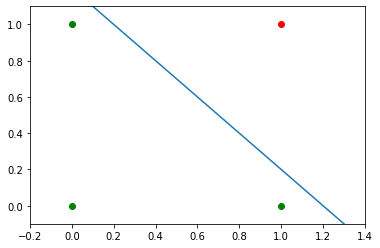

In [ ]:
#nand
X = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
y = pd.DataFrame([[1],[1],[1],[0]],columns = ['y'])
model = keras.Sequential()
model.add(Dense(1, input_dim=2, activation='relu'))
w1 = np.array([[2],[2]],np.float32) #hidden layer weights n*m : n- input dimension ; m -number of layers 
#print(w1.shape)
b1 = np.array([-1.5], np.float32) #hidden layer bias m*1 : m- number of layers
#print(b1.shape)
model.set_weights([w1, b1])
model.get_weights()
X2=X
X2['x1 nand x2']=model.predict_classes(X)
print(X2)
plot_gate(X,y)


# AND

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

[[0]
 [0]
 [0]
 [1]]
   x1  x2  x1 and x2
0   0   0          0
1   0   1          0
2   1   0          0
3   1   1          1


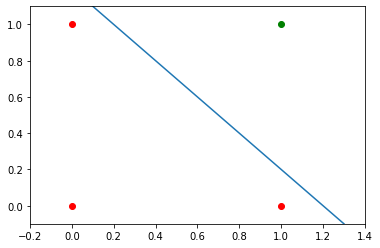

In [ ]:
#AND

# https://stackoverflow.com/questions/55643732/how-to-set-custom-weights-on-a-keras-sequential-model

model = keras.Sequential()
model.add(keras.layers.Dense(1,input_dim = 2, activation = 'sigmoid'))
# create weights with the right shape, e.g.
# weights = [np.random.rand(*w.shape) for w in model.get_weights()]
X = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
y = pd.DataFrame([[0],[0],[0],[1]],columns = ['y'])
# update
w1 = [1]
w2 = [1]
b = np.array([-1.5], np.float32)
w = np.array([w1,w2],np.float32)
model.set_weights([w, b])
model.get_weights()
print(model.predict_classes(X))
#visualizer(model, view=True)
#visualizer(model, filename="xor", format ='png', view=True)
plot_gate(X,y)
X['x1 and x2']=model.predict_classes(X)
print(X)

# OR

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


   x1  x2  x1 or x2
0   0   0         0
1   0   1         1
2   1   0         1
3   1   1         1


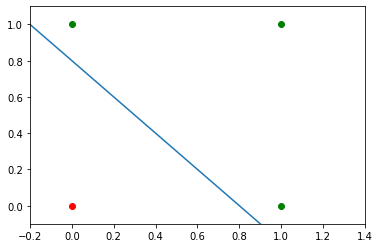

In [ ]:
def OR(X):
  model = keras.Sequential()
  model.add(keras.layers.Dense(1,input_dim = 2, activation = 'sigmoid'))
  # create weights with the right shape, e.g.
  # weights = [np.random.rand(*w.shape) for w in model.get_weights()]
  #y = pd.DataFrame([[0],[1],[1],[1]],columns = ['y'])
  # update
  w1 = [2]
  w2 = [2]
  b = np.array([-1.5], np.float32)
  w = np.array([w1,w2],np.float32)
  model.set_weights([w, b])
  model.get_weights()
  y=model.predict_classes(X)
  temp=[]
  for i in y:
    temp.append(i[0])
  y=pd.DataFrame(temp,columns=['y'])
  return y
#visualizer(model, view=True)
#visualizer(model, filename="xor", format ='png', view=True)

X = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
y=OR(X)
plot_gate(X,y)
X['x1 or x2']=y
print(X)

# NOR

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

   x1  x2  x1 or x2  x1 nor x2
0   0   0         0          1
1   0   1         1          0
2   1   0         1          0
3   1   1         1          0


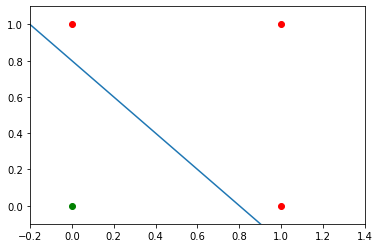

In [ ]:
X = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
y=OR(X)
z=Not(y)
plot_gate(X,z)
X['x1 or x2']=y
X['x1 nor x2']=z
print(X)

#IMPLIES

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


   x1  x2  x1 -> x2
0   0   0         1
1   0   1         1
2   1   0         0
3   1   1         1


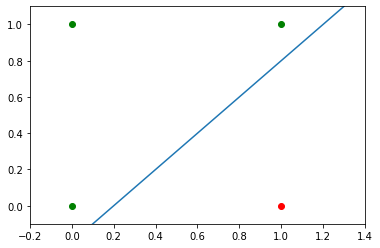

In [ ]:
# https://stackoverflow.com/questions/55643732/how-to-set-custom-weights-on-a-keras-sequential-model
def implies(X2):
  model = keras.Sequential()
  model.add(keras.layers.Dense(1,input_dim = 2, activation = 'sigmoid'))
  # create weights with the right shape, e.g.
  # weights = [np.random.rand(*w.shape) for w in model.get_weights()]

  # update
  w1 = [-1]
  w2 = [2]
  b = np.array([0.5], np.float32)
  w = np.array([w1,w2],np.float32)
  model.set_weights([w, b])
  model.get_weights()
  
  y=[]
  z=model.predict_classes(X2)
  #plot_model(model)
  for i in z:
    
    y.append(i[0])
  y=pd.DataFrame(y,columns=['y'])
  
  return y
#visualizer(model, view=True)
#visualizer(model, filename="xor", format ='png', view=True)
X2 = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
#y = pd.DataFrame([[1],[0],[1],[1]],columns = ['y'])
y=implies(X2)

plot_gate(X2,y)
X2['x1 -> x2']=y
print(X2)

# NOT

In [ ]:

def Not(X1):
  model = keras.Sequential()
  model.add(keras.layers.Dense(1,input_dim = 1, activation = 'sigmoid'))
  # create weights with the right shape, e.g.
  # weights = [np.random.rand(*w.shape) for w in model.get_weights()]
  
  # update
  w1 = [-2]
  b = np.array([0.5], np.float32)
  w = np.array([w1],np.float32)
  model.set_weights([w, b])
  model.get_weights()
  y=pd.DataFrame(model.predict_classes(X1),columns=['y'])
  
  return y
def plotnot(X1,y):
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  colors=['red' if i==0 else 'green'  for i in y['y']]
  ax1.plot(X1,X1,c='b')
  ax1.scatter(X1,y,c=colors)
  plt.show()

X1 = pd.DataFrame([[0],[1]],columns = ['x1'])
y=Not(X1)

#plotnot(X1,y)
X1['not(x1)']=y
print(X1)

   x1  not(x1)
0   0        1
1   1        0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# INHIBITION(NOT IMPLIES) USING IMPLIES AND NOT

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

   x1  x2  x1 implies x2  x1 not implies x2
0   0   0              1                  0
1   0   1              1                  0
2   1   0              0                  1
3   1   1              1                  0


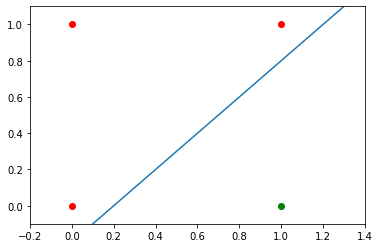

In [ ]:
X2 = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
y = implies(X2)
X3= Not(y)
plot_gate(X2,X3)
X2['x1 implies x2']=y
X2['x1 not implies x2']=X3
print(X2)

# XOR

In [ ]:
#XOR
X = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
y = pd.DataFrame([[0],[1],[1],[0]],columns = ['y'])

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
   y
0  0
1  1
2  1
3  0


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(3,input_dim = 2, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'relu'))

w1 = np.array([[5,5,-5],[-5,5,5]],np.float32)
b1 = np.array([0,-15,0], np.float32)
w2 = np.array([[5],[ -15],[5]],np.float32)
b2 = np.array([-5], np.float32)
model.set_weights([w1, b1,w2, b2])
model.get_weights()
model.predict_classes(X)
X['x1 exclusive-or x2']=model.predict_classes(X)
print(X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

   x1  x2  x1 exclusive-or x2
0   0   0                   0
1   0   1                   1
2   1   0                   1
3   1   1                   0


# XNOR

   x1  x2  x1 exclusive-nor x2
0   0   0                    1
1   0   1                    0
2   1   0                    0
3   1   1                    1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

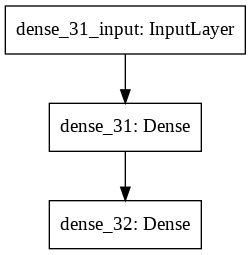

In [ ]:
#XNOR 
model = keras.Sequential()
model.add(keras.layers.Dense(2,input_dim = 2, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.get_weights()
X = pd.DataFrame([[0,0],[0,1],[1,0],[1,1]], columns = ['x1','x2'])
w1 = np.array([[5,-5],[5,-5]],np.float32)
b1 = np.array([-5,5], np.float32)
w2 = np.array([[5],[ 5]],np.float32)
b2 = np.array([-5], np.float32)
model.set_weights([w1, b1,w2, b2])
model.predict_classes(X)
X['x1 exclusive-nor x2']=model.predict_classes(X)
print(X)